# Dataset Preprocessing

In [19]:
import pandas as pd

# Load the Excel files into DataFrames
city_df = pd.read_excel('data/raw/City.xlsx')
continent_df = pd.read_excel('data/raw/Continent.xlsx')
country_df = pd.read_excel('data/raw/Country.xlsx')
item_df = pd.read_excel('data/raw/Item.xlsx')
mode_df = pd.read_excel('data/raw/Mode.xlsx')
region_df = pd.read_excel('data/raw/Region.xlsx')
transaction_df = pd.read_excel('data/raw/Transaction.xlsx')
type_df = pd.read_excel('data/raw/Type.xlsx')
user_df = pd.read_excel('data/raw/User.xlsx')

# Inspect the columns of each DataFrame
print("City columns:", city_df.columns)
print("Continent columns:", continent_df.columns)
print("Country columns:", country_df.columns)
print("Item columns:", item_df.columns)
print("Mode columns:", mode_df.columns)
print("Region columns:", region_df.columns)
print("Transaction columns:", transaction_df.columns)
print("Type columns:", type_df.columns)
print("User columns:", user_df.columns)

City columns: Index(['CityId', 'CityName', 'CountryId'], dtype='object')
Continent columns: Index(['ContenentId', 'Contenent'], dtype='object')
Country columns: Index(['CountryId', 'Country', 'RegionId'], dtype='object')
Item columns: Index(['AttractionId', 'AttractionCityId', 'AttractionTypeId', 'Attraction',
       'AttractionAddress'],
      dtype='object')
Mode columns: Index(['VisitModeId', 'VisitMode'], dtype='object')
Region columns: Index(['Region', 'RegionId', 'ContentId'], dtype='object')
Transaction columns: Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode',
       'AttractionId', 'Rating'],
      dtype='object')
Type columns: Index(['AttractionTypeId', 'AttractionType'], dtype='object')
User columns: Index(['UserId', 'ContenentId', 'RegionId', 'CountryId', 'CityId'], dtype='object')


In [41]:
# Merge transaction_df with user_df on UserId
if 'UserId' in transaction_df.columns and 'UserId' in user_df.columns:
    merged_df = pd.merge(transaction_df, user_df, on='UserId', how='left')
else:
    print("UserId column missing in either transaction_df or user_df")

# Merge merged_df with item_df on AttractionId
if 'AttractionId' in merged_df.columns and 'AttractionId' in item_df.columns:
    merged_df = pd.merge(merged_df, item_df, on='AttractionId', how='left')
else:
    print("AttractionId column missing in either merged_df or item_df")

# Merge merged_df with city_df on AttractionCityId and CityId
if 'AttractionCityId' in merged_df.columns and 'CityId' in city_df.columns:
    merged_df = pd.merge(merged_df, city_df, left_on='AttractionCityId', right_on='CityId', how='left')
else:
    print("AttractionCityId or CityId column missing in either merged_df or city_df")

# Ensure that CountryId columns exist before merging with country_df
if 'CountryId' in merged_df.columns and 'CountryId' in country_df.columns:
    merged_df = pd.merge(merged_df, country_df, on='CountryId', how='left')
else:
    print("CountryId column missing in either merged_df or country_df")

# Ensure that RegionId columns exist before merging with region_df
if 'RegionId' in merged_df.columns and 'RegionId' in region_df.columns:
    merged_df = pd.merge(merged_df, region_df, on='RegionId', how='left')
else:
    print("RegionId column missing in either merged_df or region_df")

# Ensure that ContenentId columns exist before merging with continent_df
if 'ContenentId' in merged_df.columns and 'ContenentId' in continent_df.columns:
    merged_df = pd.merge(merged_df, continent_df, left_on='ContenentId', right_on='ContenentId', how='left')
else:
    print("ContenentId column missing in either merged_df or continent_df")

# Ensure that AttractionTypeId columns exist before merging with type_df
if 'AttractionTypeId' in merged_df.columns and 'AttractionTypeId' in type_df.columns:
    merged_df = pd.merge(merged_df, type_df, on='AttractionTypeId', how='left')
else:
    print("AttractionTypeId column missing in either merged_df or type_df")

# Check and correct the data types for VisitMode before merging with mode_df
if 'VisitMode' in merged_df.columns and 'VisitMode' in mode_df.columns:
    # Convert to string type if there's a type mismatch
    if merged_df['VisitMode'].dtype != mode_df['VisitMode'].dtype:
        merged_df['VisitMode'] = merged_df['VisitMode'].astype(str)
        mode_df['VisitMode'] = mode_df['VisitMode'].astype(str)
    merged_df = pd.merge(merged_df, mode_df, on='VisitMode', how='left')
else:
    print("VisitMode column missing in either merged_df or mode_df")

# Clean up redundant columns
columns_to_drop = ['CityId_user', 'CountryId_user', 'RegionId_user', 'CityId_region', 'CountryId_region', 'RegionId_region']
columns_to_drop = [col for col in columns_to_drop if col in merged_df.columns]
merged_df.drop(columns=columns_to_drop, inplace=True)

# Save the merged DataFrame to a new Excel file
merged_df.to_excel('data/processed/Merged_Tourism_Dataset.xlsx', index=False)

CountryId column missing in either merged_df or country_df


In [42]:
merged_df.shape

(52930, 23)

In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52930 entries, 0 to 52929
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionId      52930 non-null  int64  
 1   UserId             52930 non-null  int64  
 2   VisitYear          52930 non-null  int64  
 3   VisitMonth         52930 non-null  int64  
 4   VisitMode          52930 non-null  object 
 5   AttractionId       52930 non-null  int64  
 6   Rating             52930 non-null  int64  
 7   ContenentId        52930 non-null  int64  
 8   RegionId           52930 non-null  int64  
 9   CountryId_x        52930 non-null  int64  
 10  CityId_x           52922 non-null  float64
 11  AttractionCityId   52930 non-null  int64  
 12  AttractionTypeId   52930 non-null  int64  
 13  Attraction         52930 non-null  object 
 14  AttractionAddress  52930 non-null  object 
 15  CityId_y           52930 non-null  int64  
 16  CityName           529

In [44]:
merged_df.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,ContenentId,RegionId,CountryId_x,...,Attraction,AttractionAddress,CityId_y,CityName,CountryId_y,Region,ContentId,Contenent,AttractionType,VisitModeId
0,3,70456,2022,10,2,640,5,5,21,163,...,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",1,Douala,1,Western Europe,5,Europe,Nature & Wildlife Areas,NaN
1,8,7567,2022,10,4,640,5,2,8,48,...,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",1,Douala,1,Northern America,2,America,Nature & Wildlife Areas,NaN
2,9,79069,2022,10,3,640,5,2,9,54,...,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",1,Douala,1,South America,2,America,Nature & Wildlife Areas,NaN
3,10,31019,2022,10,3,640,3,5,17,135,...,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",1,Douala,1,Central Europe,5,Europe,Nature & Wildlife Areas,NaN
4,15,43611,2022,10,2,640,3,5,21,163,...,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",1,Douala,1,Western Europe,5,Europe,Nature & Wildlife Areas,NaN


In [45]:
merged_df.isnull().sum()

TransactionId            0
UserId                   0
VisitYear                0
VisitMonth               0
VisitMode                0
AttractionId             0
Rating                   0
ContenentId              0
RegionId                 0
CountryId_x              0
CityId_x                 8
AttractionCityId         0
AttractionTypeId         0
Attraction               0
AttractionAddress        0
CityId_y                 0
CityName                 0
CountryId_y              0
Region                   0
ContentId                0
Contenent                0
AttractionType           0
VisitModeId          52930
dtype: int64

In [47]:
# Fill missing values in 'CityId_x' with a placeholder (e.g., -1)
merged_df['CityId_x'].fillna(-1, inplace=True)

# Drop the 'VisitModeId' column
merged_df.drop(columns=['VisitModeId'], inplace=True)

# Verify no missing values remain in other columns
print(merged_df.isnull().sum())

# Save the cleaned DataFrame to a new Excel file
merged_df.to_excel('data/processed/Tourism_Dataset.xlsx', index=False)

TransactionId        0
UserId               0
VisitYear            0
VisitMonth           0
VisitMode            0
AttractionId         0
Rating               0
ContenentId          0
RegionId             0
CountryId_x          0
CityId_x             0
AttractionCityId     0
AttractionTypeId     0
Attraction           0
AttractionAddress    0
CityId_y             0
CityName             0
CountryId_y          0
Region               0
ContentId            0
Contenent            0
AttractionType       0
dtype: int64


In [48]:
# Basic Statistics of Rating
print(merged_df['Rating'].describe())

count    52930.000000
mean         4.157699
std          0.970543
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64


In [81]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_excel(r'data/processed/Tourism_Dataset.xlsx')

# Define the desired column order
desired_columns = [
    'TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode', 'Contenent', 'ContenentId', 'RegionId', 'Region', 'CountryId_x', 'CountryId_y', 'CityName', 'CityId_x', 'CityId_y',
    'Attraction', 'AttractionId', 'AttractionAddress', 'AttractionType', 'AttractionTypeId', 'AttractionCityId', 'ContentId', 'Rating'
]

# Reorder the columns
df = df[desired_columns]

# Save the reshuffled DataFrame to a new Excel file
df.to_excel('data/processed/Professional_Tourism_Dataset.xlsx', index=False)

print("Professional dataset saved to 'Professional_Tourism_Dataset.xlsx'")

Professional dataset saved to 'Professional_Tourism_Dataset.xlsx'


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52930 entries, 0 to 52929
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TransactionId      52930 non-null  int64 
 1   UserId             52930 non-null  int64 
 2   VisitYear          52930 non-null  int64 
 3   VisitMonth         52930 non-null  int64 
 4   VisitMode          52930 non-null  int64 
 5   Contenent          52930 non-null  object
 6   ContenentId        52930 non-null  int64 
 7   RegionId           52930 non-null  int64 
 8   Region             52930 non-null  object
 9   CountryId_x        52930 non-null  int64 
 10  CountryId_y        52930 non-null  int64 
 11  CityName           52930 non-null  object
 12  CityId_x           52930 non-null  int64 
 13  CityId_y           52930 non-null  int64 
 14  Attraction         52930 non-null  object
 15  AttractionId       52930 non-null  int64 
 16  AttractionAddress  52930 non-null  objec

In [83]:
df.shape

(52930, 22)

In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionId,52930.0,70415.130474,66299.514206,3.0,19646.25,42770.5,105638.75,211241.0
UserId,52930.0,45024.522596,25073.062199,14.0,23470.00,45533.5,66667.00,88190.0
VisitYear,52930.0,2016.351899,1.732926,2013.0,2015.00,2016.0,2018.00,2022.0
VisitMonth,52930.0,6.633100,3.392979,1.0,4.00,7.0,9.00,12.0
VisitMode,52930.0,2.945759,1.000683,1.0,2.00,3.0,4.00,5.0
ContenentId,52930.0,3.592877,1.075526,1.0,3.00,4.0,5.00,5.0
RegionId,52930.0,14.524353,4.186649,0.0,13.00,15.0,17.00,21.0
CountryId_x,52930.0,106.297657,35.738949,1.0,93.00,109.0,121.00,164.0
CountryId_y,52930.0,1.130947,0.337345,1.0,1.00,1.0,1.00,2.0
CityId_x,52930.0,3397.611619,2326.272883,-1.0,1434.00,3156.0,4940.00,9142.0


# Plots

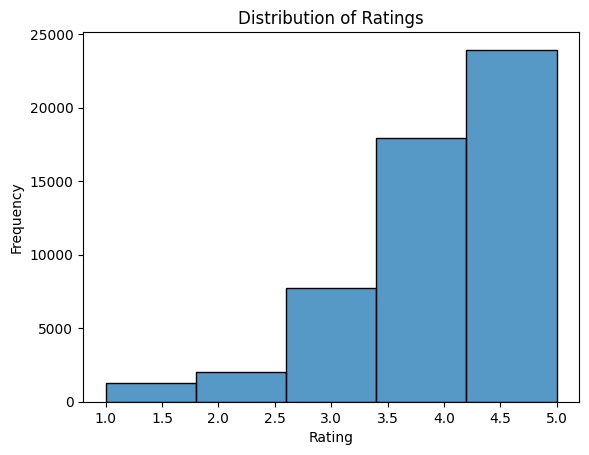

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of ratings
sns.histplot(df['Rating'], bins=5, kde=False)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

### 1. 3D Scatter Plot of Ratings Based on VisitMonth and VisitYear



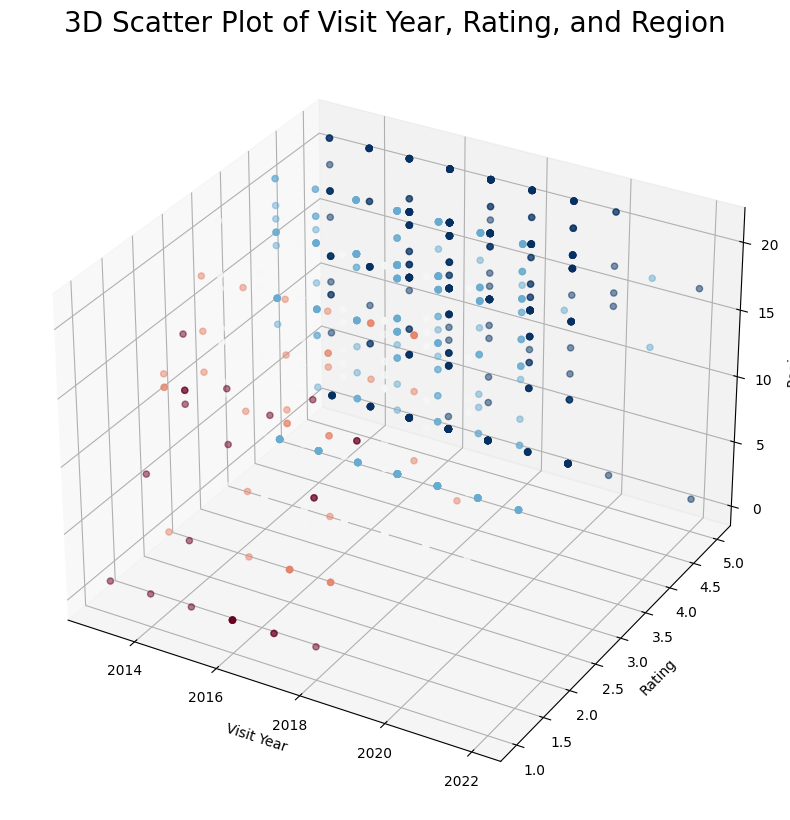

In [112]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize=(10, 10))

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot
ax.scatter(subset_df['VisitYear'], subset_df['Rating'], subset_df['Region'],
           c=subset_df['Rating'], cmap='RdBu', alpha=0.5)

# Set labels for the axes
ax.set_xlabel('Visit Year')
ax.set_ylabel('Rating')
ax.set_zlabel('Region')

# Set the plot title
plt.title('3D Scatter Plot of Visit Year, Rating, and Region', fontsize=20)

# Show the plot
plt.show()

### 2. Heatmap of Average Ratings by Month


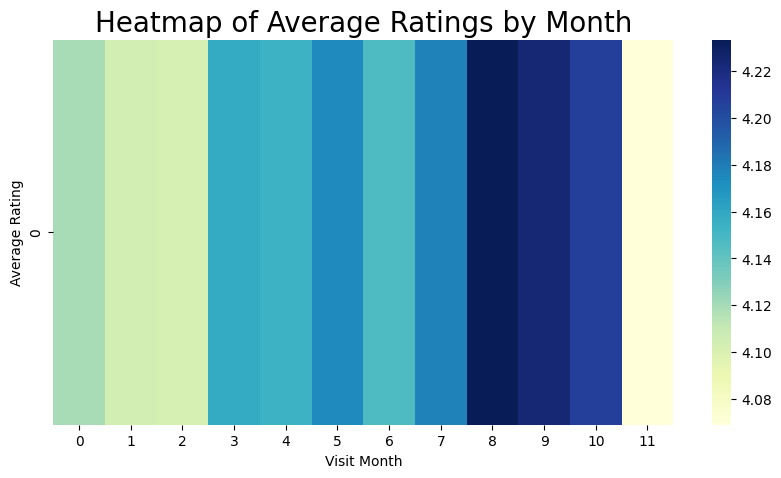

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'VisitMonth' and calculate the mean 'Rating'
monthly_ratings = df.groupby('VisitMonth')['Rating'].mean()

# Reshape the data to create a 2D array for the heatmap
monthly_ratings = monthly_ratings.values.reshape(1, -1)

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 5))

# Create the heatmap
sns.heatmap(monthly_ratings, cmap='YlGnBu', ax=ax)

# Set labels for the axes
ax.set_xlabel('Visit Month')
ax.set_ylabel('Average Rating')

# Set the plot title
plt.title('Heatmap of Average Ratings by Month', fontsize=20)

# Show the plot
plt.show()

### 3. Complex Heatmap of Ratings Across Different Cities and Attractions


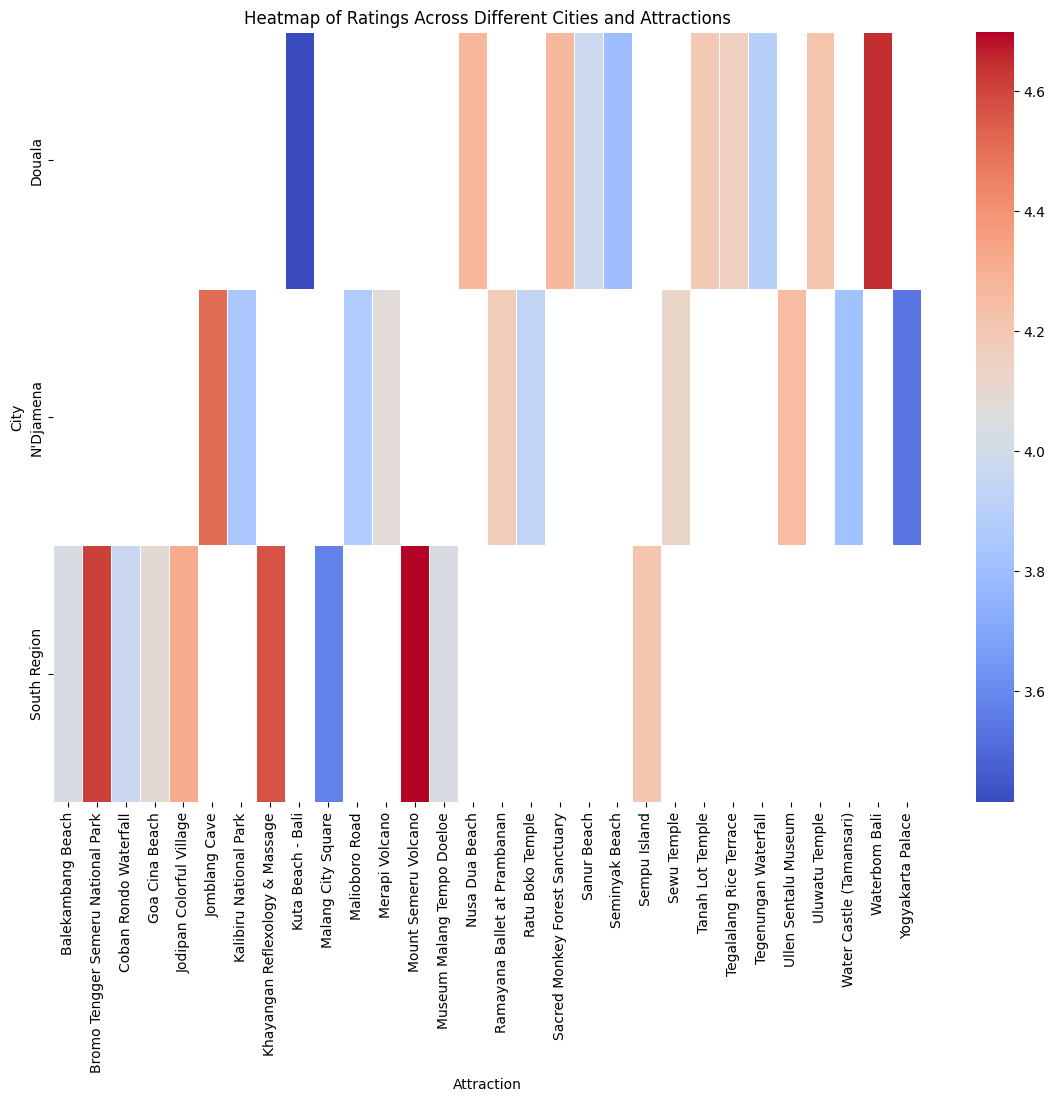

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table for heatmap
heatmap_data = df.pivot_table(values='Rating', index='CityName', columns='Attraction', aggfunc='mean')

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Heatmap of Ratings Across Different Cities and Attractions')
plt.xlabel('Attraction')
plt.ylabel('City')
plt.show()

### 4. Pair Plot for Various Numerical Attributes


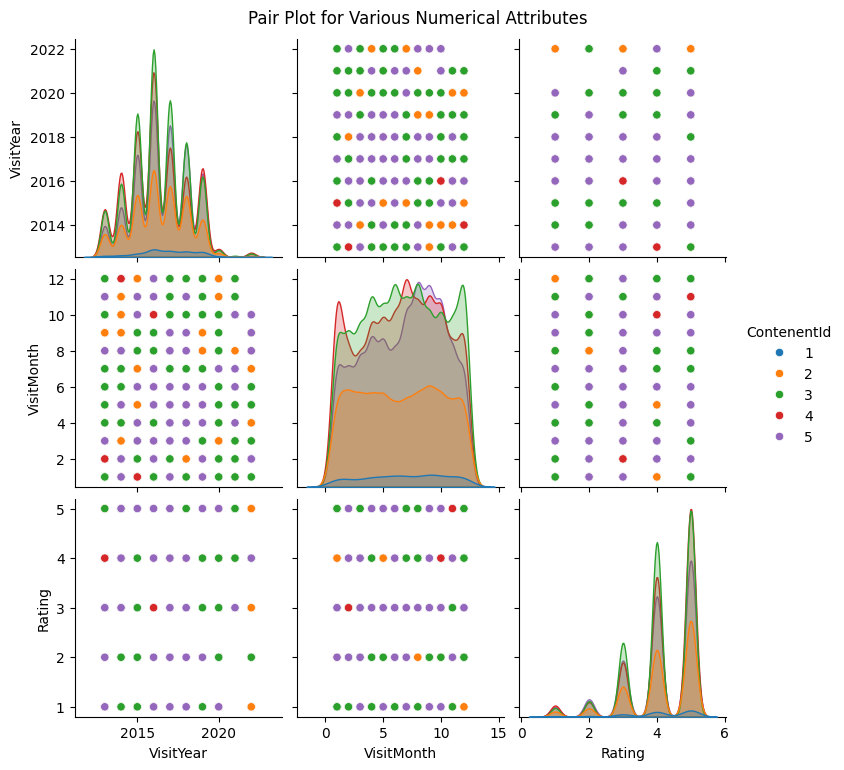

In [61]:
import seaborn as sns

# Pair Plot
sns.pairplot(df[['VisitYear', 'VisitMonth', 'Rating', 'ContenentId']], diag_kind='kde', hue='ContenentId', palette='tab10')
plt.suptitle('Pair Plot for Various Numerical Attributes', y=1.02)
plt.show()

### 5. Stacked Bar Chart for Visit Modes by Continent

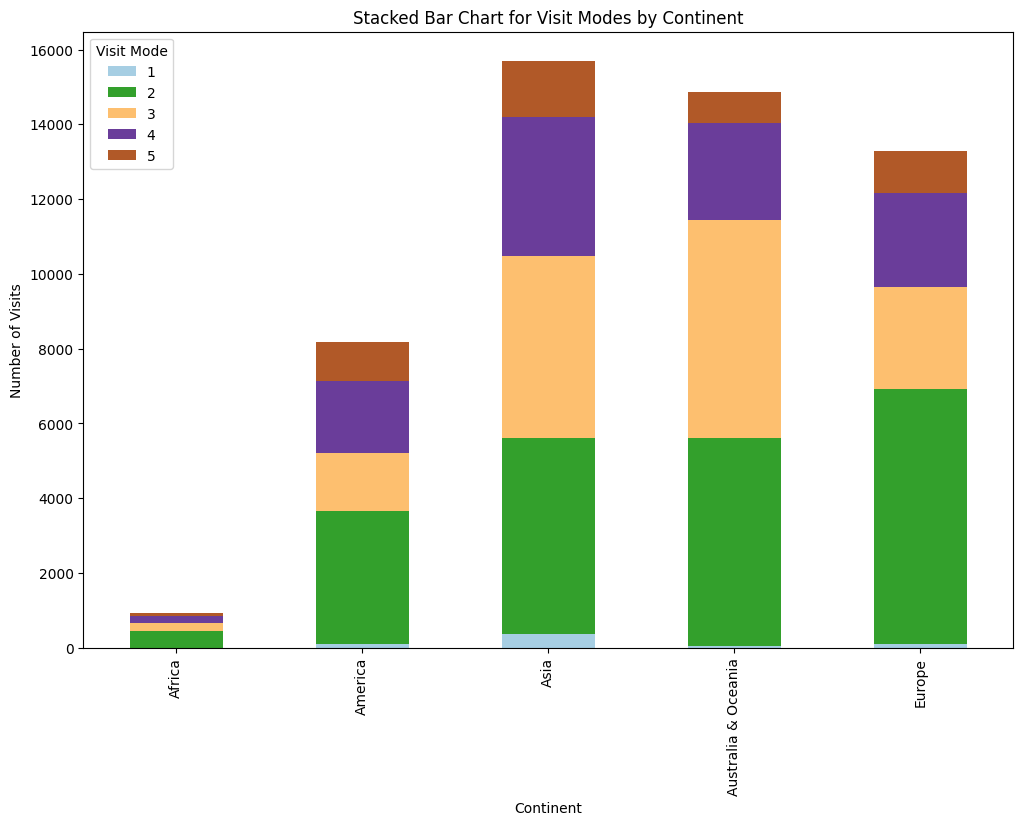

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Stacked Bar Chart
visit_mode_continent = df.groupby(['Contenent', 'VisitMode']).size().unstack()
visit_mode_continent.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Paired')

plt.title('Stacked Bar Chart for Visit Modes by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Visits')
plt.legend(title='Visit Mode')
plt.show()

### 6. Average Ratings of Attractions by Continent and Region

In [100]:
import plotly.express as px

# Calculate average ratings by continent and region
heatmap_data = df.groupby(['Contenent', 'Region'])['Rating'].mean().reset_index()

# Pivot the dataframe to create the heatmap data
heatmap_pivot = heatmap_data.pivot(index='Contenent', columns='Region', values='Rating')

# Create the heatmap
fig = px.imshow(heatmap_pivot,
                 labels=dict(x="Region", y="Continent", color="Average Rating"),
                 x=heatmap_pivot.columns, y=heatmap_pivot.index,
                 title="Average Ratings of Attractions by Continent and Region",
                 color_continuous_scale='Viridis')

# Show the plot
fig.show()

### 7. Word Cloud for Attraction Names

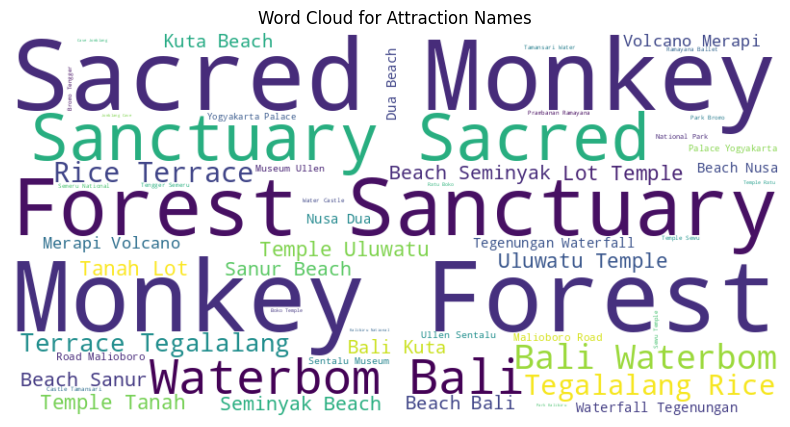

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
text = ' '.join(df['Attraction'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Attraction Names')
plt.show()

### 8. Box Plot of Ratings by Attraction Types

<ipython-input-65-e7ba9dbf94dd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AttractionType', y='Rating', palette='Set3')


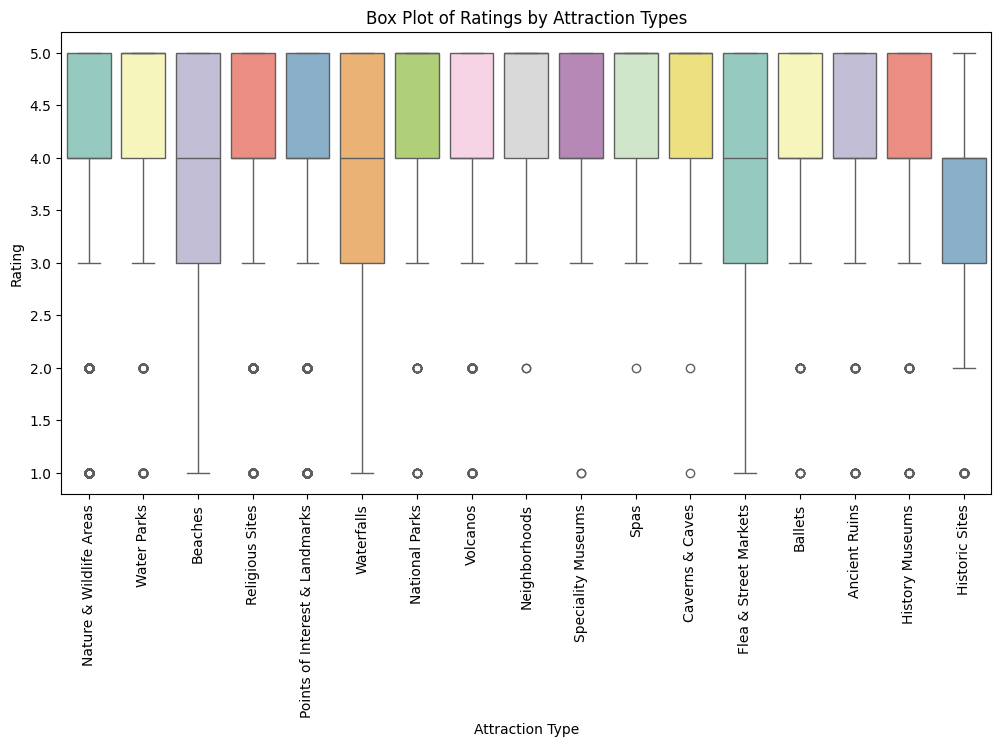

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='AttractionType', y='Rating', palette='Set3')
plt.xticks(rotation=90)
plt.title('Box Plot of Ratings by Attraction Types')
plt.xlabel('Attraction Type')
plt.ylabel('Rating')
plt.show()

### 9. Violin Plot for Ratings by Continent

<ipython-input-66-0c4486d4dea7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Contenent', y='Rating', palette='Set2')


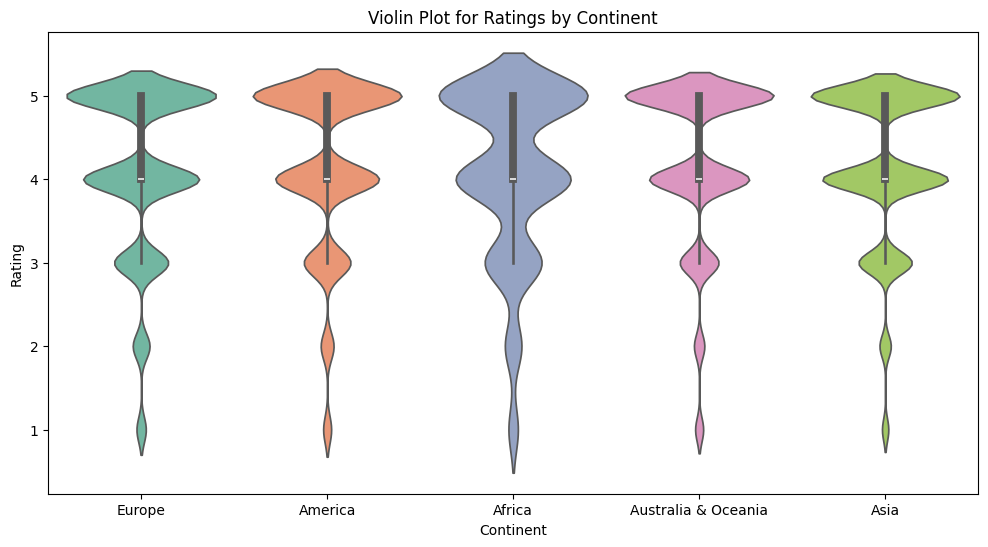

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Contenent', y='Rating', palette='Set2')
plt.title('Violin Plot for Ratings by Continent')
plt.xlabel('Continent')
plt.ylabel('Rating')
plt.show()

### 10. Bubble Plot for Attractions Based on Ratings and Visit Frequency

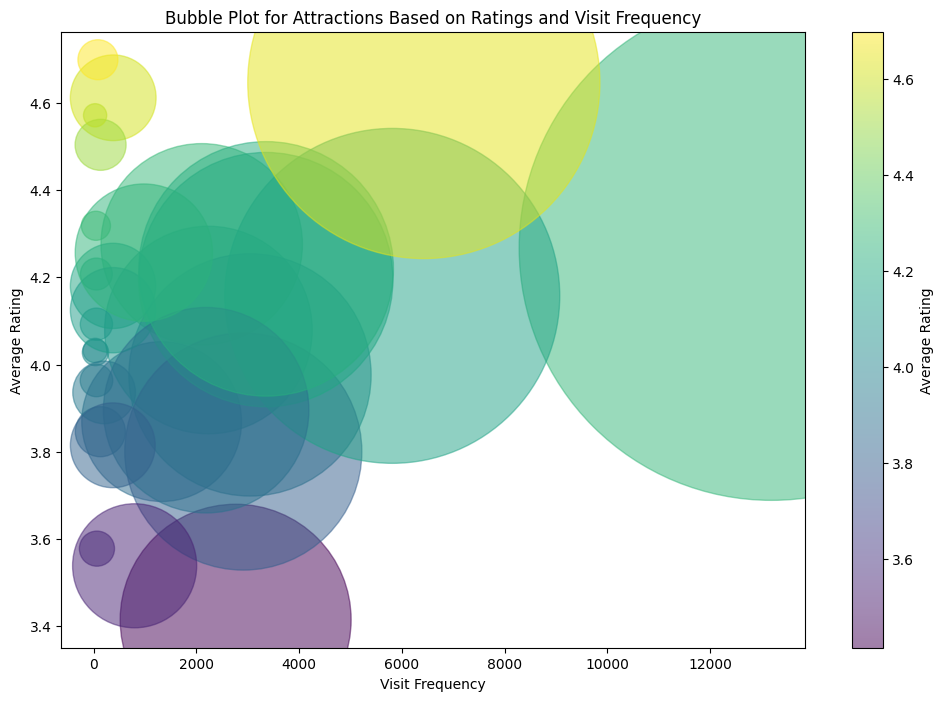

In [67]:
import matplotlib.pyplot as plt

# Aggregate data for bubble plot
agg_data = df.groupby('Attraction').agg({'Rating': 'mean', 'TransactionId': 'count'}).reset_index()
agg_data.columns = ['Attraction', 'AverageRating', 'VisitFrequency']

# Bubble Plot
plt.figure(figsize=(12, 8))
plt.scatter(x=agg_data['VisitFrequency'], y=agg_data['AverageRating'], s=agg_data['VisitFrequency']*10, alpha=0.5, c=agg_data['AverageRating'], cmap='viridis')
plt.title('Bubble Plot for Attractions Based on Ratings and Visit Frequency')
plt.xlabel('Visit Frequency')
plt.ylabel('Average Rating')
plt.colorbar(label='Average Rating')
plt.show()

### 11. Density Plot for Ratings Across Different Continents

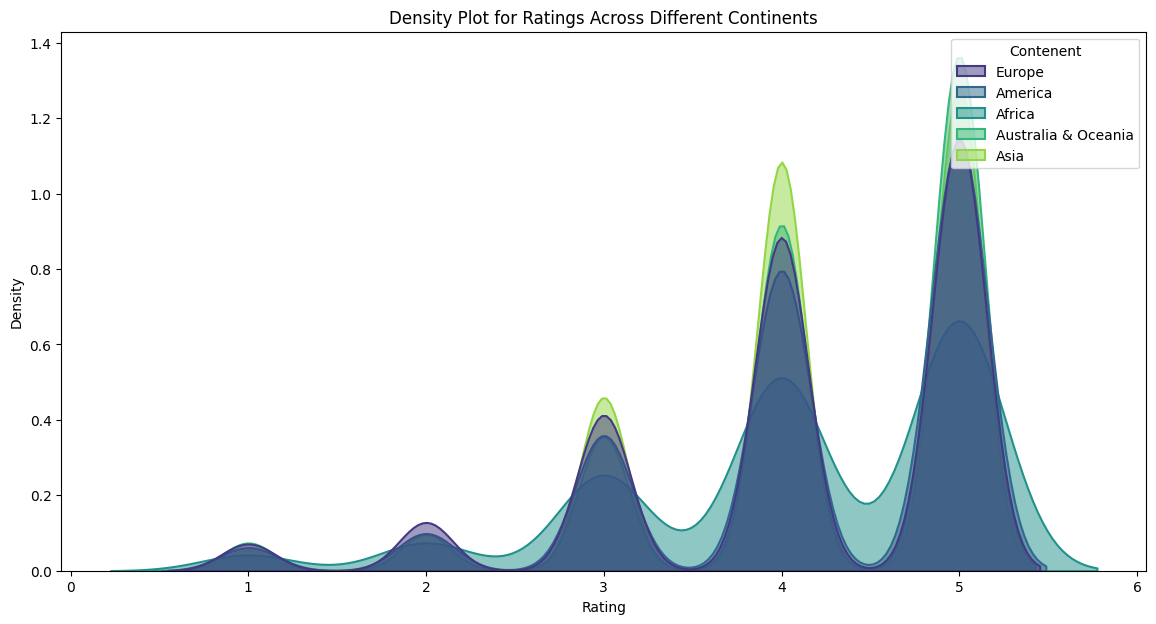

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Density Plot
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df, x='Rating', hue='Contenent', fill=True, common_norm=False, palette='viridis', alpha=0.5, linewidth=1.5)
plt.title('Density Plot for Ratings Across Different Continents')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()